In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
train_digits = pd.read_csv("data/mnist_train.csv", header=None)
#test_digits = pd.read_csv("data/mnist_test.csv")
train_array = train_digits.to_numpy()
#test_array = test_digits.to_numpy()

In [42]:
train_array.shape

(60000, 785)

In [ ]:
def show_digit(sample):
    """
    shows digit
    """
    img = test_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

In [ ]:
def avg_digit_img(dat, digit):
    """
    compute average intensities of all rows describing the same number
    :return: imshow as output
    """

    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    avg = np.zeros((1,784))
    
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    
    avg.shape = (28,28)
    avg /= len(list_digit)

    plt.imshow(avg, 'gray')
    plt.colorbar()


In [ ]:
def avg_digit_arr(dat, digit):
    """
    computes average intensities of all rows describing the same number
    returns numpy array
    """
   
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    avg = np.zeros((1,784))

    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]

    avg /= len(list_digit)

    return avg

In [ ]:
def digit_recognition(sample):
    """
    compare sample image with averaged images pixel by pixel
    select digit with lowest difference in intensity (output)
    """
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:]

    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))

In [ ]:
def return_label(sample):
    """
    can be used for validation
    """
    return test_array[sample-1, 0]

In [ ]:
avg_list = []

for i in range(0,10):
    avg_list.append(avg_digit_arr(train_array, i))

def digit_recognition_fast(sample):
    """
    faster digit recognition because avg images are stored at the beginning and not calculated each time
    """
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:] 

    for i in range(0,10):
        diff_arr = sample_img - avg_list[i]
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))

In [ ]:
#Überprüfung digit recognition mit methode vergleich zu avg images

true = 0
false = 0

#for i in range(0, test_array.shape[0]):
#if digit_recognition_fast(i+1) == test_array[i, 0]:
    true += 1
else:
    false += 1

#print(f'Anzahl richtig erkannter Digits: {true} \n\
Anzahl falsch erkannter Digits: {false} \n\
Richtig: {true/test_array.shape[0]*100} Prozent')
#66,85 Prozent

In [ ]:
#plots for project proposal

#plt.hist(train_array[:,0], rwidth = 0.9)
#plt.xlabel('digits')
#plt.ylabel('counts')
#plt.title('training dataset')


In [ ]:
def digit_rec_comp(sample):
    """
    nice output for digit recognition comparison
    """
    
    print(f'Prediction: {digit_recognition(sample)}\n\
Real digit: {return_label(sample)}')
    show_digit(sample)

In [1]:
#Z-Transformation
#Druchschnittsberechnung

mean_pixels = np.zeros((1, 784))
for i in range(0, train_array.shape[0]):
    mean_pixels += train_array[i, 1:train_array.shape[1]]
mean_pixels /= train_array.shape[0]

#Standardabweichung
std_pixels = np.zeros((1, 784))
for i in range(1, train_array.shape[1]):
    std_pixels[0, i-1] = np.std(train_array[:, i])

#print(std_pixels)

#Erstellen z-array 
z_array = np.zeros(train_array.shape)

for i in range(0, train_array.shape[0]):
    z_array[i, 0] = train_array[i, 0]
    for j in range(1, train_array.shape[1]):
        if std_pixels[0, j-1] != 0:
            z_array[i, j] = (train_array[i, j] - mean_pixels[0, j-1])/std_pixels[0, j-1]

#print(z_array)


NameError: name 'np' is not defined

In [ ]:
def kNN(img, k=5):
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []

    M = 1
    N = train_array[:, 1:].shape[0]

    img_dots = (img*img).sum(axis=0).reshape((M,1))*np.ones(shape=(1,N))
    train_array_dots = (train_array[:, 1:]*train_array[:, 1:]).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  img_dots + train_array_dots - 2*img.dot(train_array[:, 1:].T)
    D = np.sqrt(D_squared)
    
    dist_mau = D.tolist()
    dist = dist_mau[0]
    small_dist = sorted(range(len(dist)), key = lambda sub: dist[sub])[:k]
    
    for j in range(0, len(small_dist)):
        counter[train_array[small_dist[j],0]] += 1

    for k in range(0, len(counter)):
        if counter[k] == max(counter):
            max_indices.append(k)

    if len(max_indices) == 1:
        return max_indices[0]

    else:
        return 10

In [ ]:
def validation_kNN(s_size, k=5):
    true = 0
    false = 0
    doppel_max = 0

    for i in range(0, s_size):
        result_kNN = kNN(test_array[i, 1:], k)
        if result_kNN == 10:
            doppel_max += 1
        elif result_kNN != test_array[i, 0]:
            false += 1
        elif result_kNN == test_array[i, 0]:
            true += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
Anzahl mit mehreren Maxima: {doppel_max}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')


In [ ]:
#liste mit indexen von Spalten mit Std = 0
std0 = []
for i in range(1, z_array.shape[1]):
    if np.std(z_array[:, i]) == 0:
        std0.append(i)

print(std0)
    

In [ ]:
# Spalten mit Std = 0 löschen
z_cleaned = np.delete(z_array, std0, 1)

print(z_cleaned[:, 1:])

In [ ]:
#correlation
cov_arr = np.cov(z_cleaned[:, 1:], rowvar = False)
print(cov_arr)

In [ ]:
#eigenvectors and eigenvalues 
eigen_val, eigen_vec = np.linalg.eigh(cov_arr)
print(eigen_val)
print(eigen_vec)

In [ ]:
# np.argsort returns indeices that would sort and array

index_sorted = np.argsort(eigen_val)[::-1]

sorted_eigenval = eigen_val[index_sorted]
sorted_eigenvec = eigen_vec[:,index_sorted]

print(sorted_eigenval)

In [ ]:
#subset from eigenvalue matrix
n_components = 30
eigenvec_subset = sorted_eigenvec[:, 0:n_components]

In [ ]:
#transform data

X_reduced = np.dot(eigenvec_subset.transpose(), z_cleaned[:, 1:].transpose()).transpose()
X_reduced.shape

In [ ]:
#jetzt komplett als Funktion:
#input ist normale matrix, z-Transformation und Löschen von std=0 Spalten wird hier in Funktion gemacht

def PCA(X_no_label, num_components):

    #z-transformation
    std0 = []
    for i in range(0, X_no_label.shape[1]):
        if np.std(X_no_label[:, i]) == 0:
            std0.append(i)
    X_cleaned =  np.delete(X_no_label, std0, 1)

    X_z = (X_cleaned - np.mean(X_cleaned, axis = 0))/np.std(X_cleaned, axis = 0)

    #variance
    cov_arr = np.cov(X_z, rowvar = False)

    #eigenvalues, eigenvectors
    eigen_val, eigen_vec = np.linalg.eigh(cov_arr)

    #sorting
    index_sorted = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[index_sorted]
    sorted_eigenvec = eigen_vec[:,index_sorted]

    #selecting subset
    eigenvec_subset = sorted_eigenvec[:, 0:num_components]

    #dimension reduction
    X_reduced = np.dot(eigenvec_subset.transpose(), X_z.transpose()).transpose()

    return X_reduced
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg
import Functions.additional_code as add

train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
reduced_arr = pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))
train_arr_cleaned = dat.clean_train_arr()


In [10]:
def correlation_heatmap(arr, name = 'array'):
    cov_arr = np.cov(arr, rowvar = False)
    cov_df = pd.DataFrame(cov_arr)
    sb.set(rc={"figure.dpi":150, "figure.figsize":(4, 4)})
    sb.heatmap(cov_df, cmap="viridis", annot=False, square=True, cbar_kws={"shrink": 0.8})
    plt.title(f'Correlation of {name}', fontsize =9)

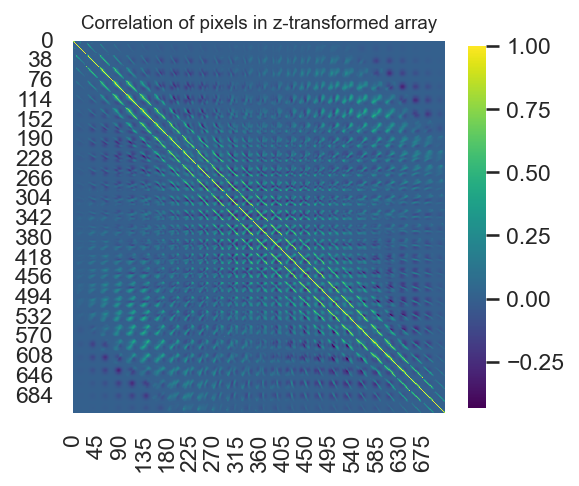

In [12]:
correlation_heatmap(z_arr, 'pixels in z-transformed array')

In [15]:
def correlation_heatmap(arr, name = 'array'):
    cov_arr = np.cov(arr, rowvar = False)
    cov_df = pd.DataFrame(cov_arr)
    print(cov_df.head())

In [16]:
correlation_heatmap(reduced_arr)

          0          1          2          3          4         5         6   \
0  36.086304  -1.244011   0.665439   2.820791   2.674260 -2.679968  0.586477   
1  -1.244011  23.963615  -1.136984  -0.952599   0.865415 -0.312005  0.188888   
2   0.665439  -1.136984  23.454626  -1.578203   1.163812  0.940837 -1.982318   
3   2.820791  -0.952599  -1.578203  19.828880  -0.176159 -0.122254  1.882130   
4   2.674260   0.865415   1.163812  -0.176159  16.461717 -1.136724  0.105600   

         7         8         9   ...        20        21        22        23  \
0 -0.525934 -2.551276 -0.637983  ... -0.405004 -1.277462 -1.403364  1.245514   
1 -0.398597 -0.951366 -0.427883  ... -0.952709 -0.385815 -0.393184  0.071496   
2 -0.663417  1.200422 -0.796886  ...  0.326591  0.898183 -0.601613  0.123973   
3  0.055501 -0.989234  0.271857  ... -0.383724 -0.626047 -0.630826  0.667559   
4 -0.650796 -1.263271 -0.828914  ... -0.658512 -0.830903 -1.405823  0.841001   

         24        25        26       

In [2]:
visualize_2d(reduced_arr, train_array[:, 0], i=2, j=3)

NameError: name 'visualize_2d' is not defined

In [3]:
import Functions.additional_code as add
import matplotlib.pyplot as plt
add.load_jpg('data/input2.jpg')

'Algorithm predicts that you inputed a handwritten 2'

In [4]:
flat_img = np.reshape(img, 784)

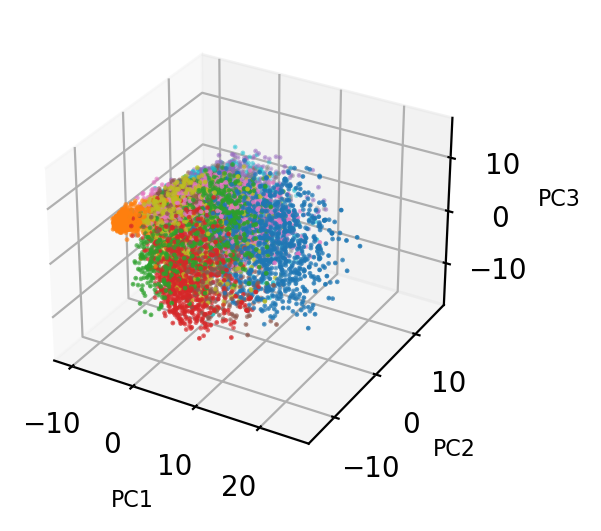

In [21]:
fig = plt.figure(figsize = (3, 3), dpi = 200)
ax = plt.axes(projection ="3d")
ax.scatter3D(reduced_arr[:10000,0], reduced_arr[:10000,1], reduced_arr[:10000,2], c = train_array[:10000,0], s=0.5, cmap = 'tab10')
ax.set_xlabel('PC1', fontsize = 8)
ax.set_ylabel('PC2', fontsize = 8)
ax.set_zlabel('PC3', fontsize = 8)
plt.show()

In [79]:

def principal_comp_2d(reduced_arr, labels, i=1, j=2):
    """
    scatterplot of principal images based on principal components

    :param reduced_arr: dataset with PCs as features
    :param labels: in this case labels of digits for colour coding in plot
    """
    f, ax = plt.subplots(figsize=(2.5, 2.5))
    pca_df = pd.DataFrame(data = {f'PC{i}':reduced_arr[:, i-1], f'PC{j}':reduced_arr[:, j-1]})

    a = sb.scatterplot(data = pca_df, x = f'PC{i}', y = f'PC{j}', hue = labels ,s = 1.5, palette = 'icefire', legend='full', ax=ax)
    a.legend(loc='center left', bbox_to_anchor=(1, 0.3, .5, .5), fontsize='xx-small')
    plt.xlabel(f'PC{i}', fontsize=9)
    plt.ylabel(f'PC{j}', fontsize=9)
    f.suptitle('Scatterplot of images with two PCs', fontsize=10)
    plt.show()

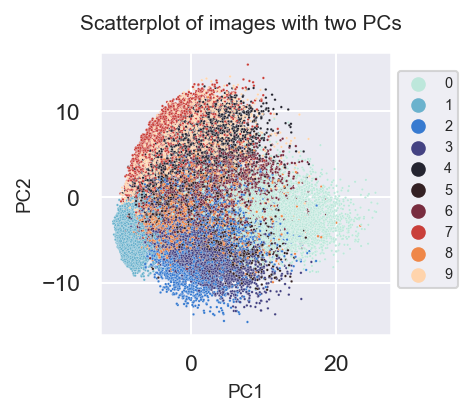

In [80]:
principal_comp_2d(reduced_arr, train_array[:,0], i=1, j=2)

In [17]:
#Anteil Varianz der PCs 

def calculate_variance_str(num_components):
    """
    variance of given number of principal components

    :param num_components: number of components (integer)
    :return: Anteil der Varianz
    """

    cov_arr = np.cov(train_arr_cleaned, rowvar = False)
    eigen_val, eigen_vec = np.linalg.eigh(cov_arr)
    index_sorted = np.argsort(eigen_val)[::-1]
    sorted_eigenaval = eigen_val[index_sorted]

    variance = np.sum(sorted_eigenaval[:num_components])/np.sum(sorted_eigenaval)*100
    
    
    print(f'{num_components} principal components obtain {variance} percent of the total variance')

In [26]:
def calculate_variance_float(num_components):
    """
    variance of given number of principal components

    :param num_components: number of components (integer)
    :return: Anteil der Varianz
    """

    cov_arr = np.cov(train_arr_cleaned, rowvar = False)
    eigen_val, eigen_vec = np.linalg.eigh(cov_arr)
    index_sorted = np.argsort(eigen_val)[::-1]
    sorted_eigenaval = eigen_val[index_sorted]

    var = np.sum(sorted_eigenaval[:num_components])/np.sum(sorted_eigenaval)*100
    
    
    return var

In [4]:
def barplot_false_digits():
    false_proportion_df = pd.read_csv("data/false_prop.csv", header = None)
    false_proportion = false_proportion_df.to_numpy()
    false_proportion_rel = false_proportion / sum(false_proportion)
    false = []
    for i in range(0,10):
        false.append(false_proportion_rel[i][0]*100)
    
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_axes([0,0,1,1])
    digits = [x for x in range(0,10)]

    ax.bar(digits, false)
    plt.xticks(range(0,10,1))

    ax.set_xlabel('digit', fontsize=9)
    ax.set_ylabel('proportion of wrongly classified digits', fontsize=9)
    ax.set_title('Wrongly classified digits', fontweight='bold')
    plt.show()

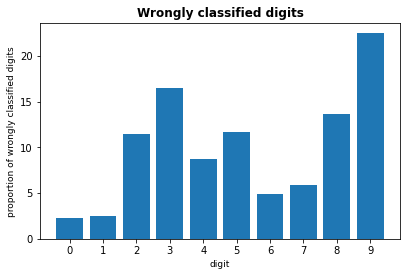

In [5]:
barplot_false_digits()

In [10]:
#load csv as numpy-array
false_proportion_df = pd.read_csv("data/false_prop.csv", header = None)
false_proportion = false_proportion_df.to_numpy()

In [11]:
# which digits are how often missed by prediction relative to all false-results -> 9 is most often missed
false_proportion_rel = false_proportion / sum(false_proportion)

In [27]:
false = []
for i in range(0,10):
    false.append(false_proportion_rel[i][0]*100)

print(false)

[2.2697541244858273, 2.494578488799579, 11.450677950467329, 16.45151415414366, 8.720311797043026, 11.715384152155982, 4.8618096469896335, 5.905381081373097, 13.627649386611488, 22.502939217930372]


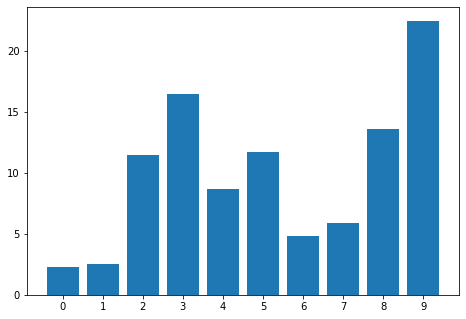

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
digits = [x for x in range(0,10)]

ax.bar(digits, false)
plt.xticks(range(0,10,1))
a
plt.show()

In [8]:
val_arr = dat.load_val_arr()
precise_val_arr = dat.load_precise_val_arr()

In [17]:
def heatmap_k_PC(arr, ind_range, col_range, large=True, medium=False, small=False):
    '''
    returns heatmap displaying accuracy for variable k's and PC's
    :param arr: array which displays accuracy for k's on x-axis and PC's on y-axis
    :param ind_range: indeces-labeling, input -> range(a, b) a = start-value, b = end-value + 1
    :param col_range: col-labeling, input -> range(a, b) a = start-value, b = end-value + 1
    '''
    arr_df = pd.DataFrame(arr)
    inds = list(ind_range)
    cols = list(col_range)
    arr_df.set_axis([inds], axis='index', inplace=True)
    arr_df.set_axis([cols], axis = 'columns', inplace=True)
    if large == True:
        sb.set(font_scale=0.5, rc={"figure.dpi":200, "figure.figsize":(2.5, 2.5)})
        plt.title('Accuracy (%) with variable PCs and ks \n 1000 samples', fontsize =8, fontweight = 'bold')

    if medium == True:
        sb.set(font_scale=0.5, rc={"figure.dpi":200, "figure.figsize":(1.75, 1.75)})
        plt.title('Accuracy (%) with variable PCs and ks \n 1000 samples', fontsize =6, fontweight = 'bold')

    if small == True:
        sb.set(font_scale=0.5, rc={"figure.dpi":200, "figure.figsize":(1.5, 1.5)})
        plt.title('Accuracy (%) with variable PCs and ks \n 10000 samples', fontsize =6, fontweight = 'bold')

    sb.heatmap(arr_df, cmap="viridis", square=False, cbar_kws={"shrink": 0.9})

    plt.xlabel('number of k')
    plt.ylabel('number of PC')

**Validation**

In [10]:

def z_arr(arr):
    """
    centering and scaling, returns z-transformed array

    :param arr: cleaned array, without label
    """
    clean_arr = np.delete(arr, std0, 1)
    z_arr = (clean_arr - np.mean(train_arr_cleaned, axis = 0))/np.std(train_arr_cleaned, axis = 0)    
    
    return z_arr

In [11]:
train_array, test_array = dat.load_data()
z_array = dat.load_z_arr_train()
std0 = dat.std0_load()
z_test = z_arr(test_array[:,1:])

In [12]:
def kNN(ref_arr, arr_reduced, img_reduced, k, train = True):
    """
    k nearest neighbours, returns the digit which had the smallest euclidean distances among k-neighbours
    :param ref_arr: Reference array with labels in the 1st column
    :param arr_reduced: Principle components of training data, without labels
    :param img_reduced: Principle components of sample image
    :k: number of nearest neighbours
    :train: "True" if sample image comes from training data
    """

   # Euclidian distance between sample image and all images in training array
    arr_rows = arr_reduced.shape[0]
    img_dot = (img_reduced**2).sum(axis=0)*np.ones(shape=(1,arr_rows))
    arr_dot = (arr_reduced[:, :]**2).sum(axis=1)
    dist_arr =  np.sqrt(img_dot + arr_dot - 2*np.dot(img_reduced, arr_reduced[:, :].T))
    dist = dist_arr.tolist()[0]
    
    counter = [0,0,0,0,0,0,0,0,0,0]
    max_indices = []
    
    # List with labels of k nearest neighbours 
    if train == True:
        k_nearest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1:k+1]
    else:
        k_nearest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0:k]

    # Which label occurs how often?
    for i in range(0, k):
        counter[ref_arr[k_nearest[i],0]] += 1
    for j in range(0, 9):
        if counter[j] == max(counter):
            max_indices.append(j)
            
    # Return the most featured label
    if len(max_indices) == 1:
        return max_indices[0]
        
    # Return the nearest neighbour, in case there are several labels occuring equally often
    else:
        if train == True:
            nearest = sorted(range(len(dist)), key = lambda sub: dist[sub])[1]
        else:
            nearest = sorted(range(len(dist)), key = lambda sub: dist[sub])[0]
        return ref_arr[nearest,0]

In [13]:
def validation_kNN(s_size, k=3, PC=29):
    """
    validates the error-rate (string) of kNN for given sample size, k, number of PC

    :param s_size: number of pictures send into kNN-code
    :param k: k nearest neighbours being selected
    :param PC: number of principle components being compared
    """

    true = 0
    false = 0
    eigenvectors_sorted = pca.create_sorted_eigenvec(PC)
    pca_arr = pca.arr_only(z_array, eigenvectors_sorted)
    
    for i in range(0, s_size):

        z_image = z_test[i, :]
        pca_img = pca.image_only(z_image, eigenvectors_sorted)


        result_kNN = kNN(train_array, pca_arr, pca_img, k, train=False)
        if result_kNN == test_array[i, 0]:
            true += 1
        else:
            false += 1

    return print(f'Accuracy: {(true/s_size)*100}%')

In [15]:
validation_kNN_train(10000)

Accuracy: 97.0%


In [1]:
import Functions.k_nearest as knn

In [2]:
knn.validation_kNN(10)

Accuracy: 100.0%
